<a href="https://colab.research.google.com/github/daniellekarlas/MLSENAC_Danielle/blob/main/ProjetoFinalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl #importando o matplotlib
mpl.__version__ #versão usada
import seaborn as sns

Dataset sobre casos de Dengue da Secretária de Saúde do Recife com 9217 linhas × 126 colunas. 

As características selecionadas para o estudo foram:

nu_notificacao             
dt_diagnostico_sintoma     
nu_idade                   
tp_sexo                    M=masculino, F=feminino, I=ignorado

tp_gestante  "1. 1º Trimestre, 2. 2º Trimestre, 3. 3º Trimestre, 4. Idade gestacional ignorada, 5. Não, 6. Não se aplica, 9. Ignorado"

tp_raca_cor                "1- branca, 2- preta, 3- amarela, 4- parda, 5- indígena, 9 Ignorado"

tp_escolaridade            "43 Analfabeto, 1- 1ª a 4ª série incompleta do EF, 2- 4ª série completa do EF (antigo 1° grau), 3- 5ª à 8ª série incompleta do EF (antigo ginásio ou 1°grau), 4- Ensino fundamental completo (antigo ginásio ou 1° grau), 5- Ensino médio incompleto(antigo colegial ou 2° grau), 6- Ensino médio completo (antigo colegial ou 2° grau), 7- Educação superior incompleta, 8- Educação superior completa, 9- Ignorado, 10- Não se aplica"

co_bairro_residencia       0

febre                     "1 – Sim, 2 – Não"

mialgia                    "1 – Sim, 2 – Não"

cefaleia                   "1 – Sim, 2 – Não"

exantema                   "1 – Sim, 2 – Não"

vomito                     "1 – Sim, 2 – Não"

nausea                     "1 – Sim, 2 – Não"

dor_costas                 "1 – Sim, 2 – Não"

conjutivite                "1 – Sim, 2 – Não"

artrite                   "1 – Sim, 2 – Não"

artralgia                  "1 – Sim, 2 – Não"

petequia_n                 "1 – Sim, 2 – Não"

leucopenia                 "1 – Sim, 2 – Não"

laco                       "1 – Sim, 2 – Não"

dor_retro                  "1 – Sim, 2 – Não"

diabetes                   "1 – Sim, 2 – Não"

hematolog                 "1 – Sim, 2 – Não"

hepatopat                  "1 – Sim, 2 – Não"

renal                      "1 – Sim, 2 – Não"

hipertensao                "1 – Sim, 2 – Não"

acido_pept                 "1 – Sim, 2 – Não"

auto_imune                 "1 – Sim, 2 – Não"

tp_classificacao_final     "1 - Dengue Clássico, 2 - Dengue com Complicações, 3 - Febre Hemorrágica do Dengue – FHD, 4 – Síndrome do choque da Dengue – SCD, 5 -Descartado, 8-Inconclusivo, 10-Dengue, 11-Dengue com sinais de alarme, 12-Dengue grave"

tp_criterio_confirmacao    "1-Laboratório, 2-Clínico Epidemiológico, 3-Em investigação"

tp_evolucao_caso           "1-cura, 2-óbito por dengue, 3-óbito por outras causas, 4-óbito em investigação, 9-ignorado"

###Objetivo

Verificar as relações entre escolaridade com as notificações de dengue. Considerando que a dengue é uma doença negligenciada e a sua incidência pode estar relacionada ao nível de conhecimento e acesso a informação do indivíduo.

O dataset foi dividido em dois grupos:

dados sociais x dengue = com essa análise busquei entender que fatores sociais poderiam contribuir para uma maior incid6encia de casos.

sintomas x dengue = com essa análise busquei entender se seria possível criar um sistema com os sintomas para predizer o diagnóstico a partir dos sintomas clínicos. 

In [565]:
df=pd.read_csv("http://dados.recife.pe.gov.br/dataset/2a9b1c39-0700-4ddf-9a10-b3c8d5d9396c/resource/e4a91dfc-b479-4f63-8a83-018c21bc0312/download/dengon2021_recife.csv", sep=";")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (54,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [566]:
df


,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,...,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
0,3763405,2,A90,2021-01-05,202101,2021,26,260790,1497.0,2431319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3729166,2,A90,2021-01-06,202101,2021,26,261160,1497.0,604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3843264,2,A90,2021-01-06,202101,2021,26,261160,1497.0,3008002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3730948,2,A90,2021-01-06,202101,2021,26,261160,1497.0,930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3730884,2,A90,2021-01-06,202101,2021,26,261160,1497.0,671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9212,3862265,2,A90,2021-10-06,202140,2021,26,261160,1497.0,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9213,3862266,2,A90,2021-10-06,202140,2021,26,261160,1497.0,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9214,3862267,2,A90,2021-10-06,202140,2021,26,261160,1497.0,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9215,3862268,2,A90,2021-10-06,202140,2021,26,261160,1497.0,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [567]:
df.info

<bound method DataFrame.info of       nu_notificacao  tp_notificacao co_cid dt_notificacao  \
0            3763405               2    A90     2021-01-05   
1            3729166               2    A90     2021-01-06   
2            3843264               2    A90     2021-01-06   
3            3730948               2    A90     2021-01-06   
4            3730884               2    A90     2021-01-06   
...              ...             ...    ...            ...   
9212         3862265               2    A90     2021-10-06   
9213         3862266               2    A90     2021-10-06   
9214         3862267               2    A90     2021-10-06   
9215         3862268               2    A90     2021-10-06   
9216         4081186               2    A90     2021-10-06   

      ds_semana_notificacao  notificacao_ano  co_uf_notificacao  \
0                    202101             2021                 26   
1                    202101             2021                 26   
2                    2

In [568]:
df.shape

(9217, 126)

In [569]:
df.describe

<bound method NDFrame.describe of       nu_notificacao  tp_notificacao co_cid dt_notificacao  \
0            3763405               2    A90     2021-01-05   
1            3729166               2    A90     2021-01-06   
2            3843264               2    A90     2021-01-06   
3            3730948               2    A90     2021-01-06   
4            3730884               2    A90     2021-01-06   
...              ...             ...    ...            ...   
9212         3862265               2    A90     2021-10-06   
9213         3862266               2    A90     2021-10-06   
9214         3862267               2    A90     2021-10-06   
9215         3862268               2    A90     2021-10-06   
9216         4081186               2    A90     2021-10-06   

      ds_semana_notificacao  notificacao_ano  co_uf_notificacao  \
0                    202101             2021                 26   
1                    202101             2021                 26   
2                   

In [570]:
df.head()

,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,...,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
0,3763405,2,A90,2021-01-05,202101,2021,26,260790,1497.0,2431319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3729166,2,A90,2021-01-06,202101,2021,26,261160,1497.0,604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3843264,2,A90,2021-01-06,202101,2021,26,261160,1497.0,3008002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3730948,2,A90,2021-01-06,202101,2021,26,261160,1497.0,930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3730884,2,A90,2021-01-06,202101,2021,26,261160,1497.0,671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [571]:
df.tail()

,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,...,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
9212,3862265,2,A90,2021-10-06,202140,2021,26,261160,1497.0,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9213,3862266,2,A90,2021-10-06,202140,2021,26,261160,1497.0,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9214,3862267,2,A90,2021-10-06,202140,2021,26,261160,1497.0,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9215,3862268,2,A90,2021-10-06,202140,2021,26,261160,1497.0,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9216,4081186,2,A90,2021-10-06,202140,2021,26,261160,1497.0,1120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [572]:
df.isna().sum()

nu_notificacao              0
tp_notificacao              0
co_cid                      0
dt_notificacao              0
ds_semana_notificacao       0
                         ... 
plasmatico               9217
evidencia                9217
plaq_menor               9217
con_fhd                  9217
complica                 9217
Length: 126, dtype: int64

In [573]:
df.isnull().sum()

nu_notificacao              0
tp_notificacao              0
co_cid                      0
dt_notificacao              0
ds_semana_notificacao       0
                         ... 
plasmatico               9217
evidencia                9217
plaq_menor               9217
con_fhd                  9217
complica                 9217
Length: 126, dtype: int64

In [574]:
df.dtypes

nu_notificacao             int64
tp_notificacao             int64
co_cid                    object
dt_notificacao            object
ds_semana_notificacao      int64
                          ...   
plasmatico               float64
evidencia                float64
plaq_menor               float64
con_fhd                  float64
complica                 float64
Length: 126, dtype: object

In [575]:
df.columns.tolist()

['nu_notificacao',
 'tp_notificacao',
 'co_cid',
 'dt_notificacao',
 'ds_semana_notificacao',
 'notificacao_ano',
 'co_uf_notificacao',
 'co_municipio_notificacao',
 'id_regional',
 'co_unidade_notificacao',
 'dt_diagnostico_sintoma',
 'ds_semana_sintoma',
 'dt_nascimento',
 'nu_idade',
 'tp_sexo',
 'tp_gestante',
 'tp_raca_cor',
 'tp_escolaridade',
 'co_uf_residencia',
 'co_municipio_residencia',
 'co_regional_residencia',
 'co_distrito_residencia',
 'co_bairro_residencia',
 'no_bairro_residencia',
 'co_logradouro_residencia',
 'nome_logradouro_residencia',
 'nu_cep_residencia',
 'tp_zona_residencia',
 'co_pais_residencia',
 'dt_investigacao',
 'co_cbo_ocupacao',
 'febre',
 'mialgia',
 'cefaleia',
 'exantema',
 'vomito',
 'nausea',
 'dor_costas',
 'conjutivite',
 'artrite',
 'artralgia',
 'petequia_n',
 'leucopenia',
 'laco',
 'dor_retro',
 'diabetes',
 'hematolog',
 'hepatopat',
 'renal',
 'hipertensao',
 'acido_pept',
 'auto_imune',
 'dt_chil_s1',
 'dt_chil_s2',
 'dt_prnt',
 'res_ch

In [576]:
df1=df.drop(columns=['tp_notificacao',
 'co_cid', 'dt_diagnostico_sintoma',
 'dt_notificacao',
 'ds_semana_notificacao',
 'notificacao_ano',
 'co_uf_notificacao',
 'co_municipio_notificacao',
 'id_regional',
 'co_unidade_notificacao', 'ds_semana_sintoma',
 'dt_nascimento','co_uf_residencia',
 'co_municipio_residencia',
 'co_regional_residencia',
 'co_distrito_residencia', 'no_bairro_residencia',
 'co_logradouro_residencia',
 'nome_logradouro_residencia',
 'nu_cep_residencia',
 'tp_zona_residencia',
 'co_pais_residencia',
 'dt_investigacao',
 'co_cbo_ocupacao', 'dt_chil_s1',
 'dt_chil_s2',
 'dt_prnt',
 'res_chiks1',
 'res_chiks2',
 'resul_prnt',
 'dt_coleta_exame',
 'tp_result_exame',
 'dt_coleta_NS1',
 'Tp_result_NS1',
 'dt_coleta_isolamento',
 'tp_result_isolamento',
 'dt_coleta_rtpcr',
 'tp_result_rtpcr',
 'tp_sorotipo',
 'tp_result_histopatologia',
 'tp_result_imunohistoquimica',
 'st_ocorreu_hospitalizacao',
 'dt_internacao',
 'co_uf_hospital',
 'co_municipio_hospital',
 'tp_autoctone_residencia',
 'co_uf_infeccao',
 'co_pais_infeccao',
 'co_municipio_infeccao',
 'co_distrito_infeccao', 'no_bairro_infeccao', 'st_doenca_trabalho',
 'clinc_chik', 'dt_obito',
 'dt_encerramento',
 'alrm_hipot',
 'alrm_plaq',
 'alrm_vom',
 'alrm_sang',
 'alrm_hemat',
 'alrm_abdom',
 'alrm_letar',
 'alrm_hepat',
 'alrm_liq',
 'dt_alrm',
 'grav_pulso',
 'grav_conv',
 'grav_ench',
 'grav_insuf',
 'grav_taqui',
 'grav_extre',
 'grav_hipot',
 'grav_hemat',
 'grav_melen',
 'grav_metro',
 'grav_sang',
 'grav_ast',
 'grav_mioc',
 'grav_consc',
 'grav_orgao',
 'dt_grav',
 'mani_hemor',
 'epistaxe',
 'gengivo',
 'metro',
 'petequias',
 'hematura',
 'sangram',
 'laco_n',
 'plasmatico',
 'evidencia',
 'plaq_menor',
 'con_fhd',
 'complica', 'co_bairro_infeccao'])

In [577]:
df1

,nu_notificacao,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_bairro_residencia,febre,mialgia,cefaleia,...,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune,tp_classificacao_final,tp_criterio_confirmacao,tp_evolucao_caso
0,3763405,4040,F,5.0,4,9.0,23.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,1.0
1,3729166,4028,F,5.0,4,9.0,40.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,1.0
2,3843264,4027,F,9.0,9,9.0,69.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,1.0
3,3730948,4008,M,6.0,4,9.0,23.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,1.0
4,3730884,4041,F,9.0,4,9.0,22.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9212,3862265,4009,M,6.0,4,NaN,38.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
9213,3862266,4003,M,6.0,2,10.0,10.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
9214,3862267,4004,M,6.0,1,10.0,56.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
9215,3862268,4002,F,6.0,4,10.0,NaN,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN


In [578]:
df1.isna().sum()

nu_notificacao                0
nu_idade                      0
tp_sexo                       0
tp_gestante                   8
tp_raca_cor                   0
tp_escolaridade            1547
co_bairro_residencia        115
febre                       114
mialgia                     114
cefaleia                    114
exantema                    114
vomito                      114
nausea                      114
dor_costas                  114
conjutivite                 114
artrite                     114
artralgia                   114
petequia_n                  114
leucopenia                  114
laco                        114
dor_retro                   114
diabetes                    114
hematolog                   114
hepatopat                   114
renal                       114
hipertensao                 114
acido_pept                  114
auto_imune                  114
tp_classificacao_final      529
tp_criterio_confirmacao    1160
tp_evolucao_caso           1304
dtype: i

In [579]:
df2=df1.dropna()

In [580]:
df2.isna().sum()

nu_notificacao             0
nu_idade                   0
tp_sexo                    0
tp_gestante                0
tp_raca_cor                0
tp_escolaridade            0
co_bairro_residencia       0
febre                      0
mialgia                    0
cefaleia                   0
exantema                   0
vomito                     0
nausea                     0
dor_costas                 0
conjutivite                0
artrite                    0
artralgia                  0
petequia_n                 0
leucopenia                 0
laco                       0
dor_retro                  0
diabetes                   0
hematolog                  0
hepatopat                  0
renal                      0
hipertensao                0
acido_pept                 0
auto_imune                 0
tp_classificacao_final     0
tp_criterio_confirmacao    0
tp_evolucao_caso           0
dtype: int64

In [581]:
""" 
nu_notificacao             
dt_diagnostico_sintoma     
nu_idade                   
tp_sexo                    M=masculino, F=feminino, I=ignorado
tp_gestante               "1. 1º Trimestre, 2. 2º Trimestre, 3. 3º Trimestre, 4. Idade gestacional ignorada, 5. Não, 6. Não se aplica, 9. Ignorado"
tp_raca_cor                "1- branca, 2- preta, 3- amarela, 4- parda, 5- indígena, 9 Ignorado"
tp_escolaridade            "43 Analfabeto, 1- 1ª a 4ª série incompleta do EF, 2- 4ª série completa do EF (antigo 1° grau), 3- 5ª à 8ª série incompleta do EF (antigo ginásio ou 1°grau), 4- Ensino fundamental completo (antigo ginásio ou 1° grau), 5- Ensino médio incompleto(antigo colegial ou 2° grau), 6- Ensino médio completo (antigo colegial ou 2° grau), 7- Educação superior incompleta, 8- Educação superior completa, 9- Ignorado, 10- Não se aplica"
co_bairro_residencia       0
febre                     "1 – Sim, 2 – Não"
mialgia                    "1 – Sim, 2 – Não"
cefaleia                   "1 – Sim, 2 – Não"
exantema                   "1 – Sim, 2 – Não"
vomito                     "1 – Sim, 2 – Não"
nausea                     "1 – Sim, 2 – Não"
dor_costas                 "1 – Sim, 2 – Não"
conjutivite                "1 – Sim, 2 – Não"
artrite                   "1 – Sim, 2 – Não"
artralgia                  "1 – Sim, 2 – Não"
petequia_n                 "1 – Sim, 2 – Não"
leucopenia                 "1 – Sim, 2 – Não"
laco                       "1 – Sim, 2 – Não"
dor_retro                  "1 – Sim, 2 – Não"
diabetes                   "1 – Sim, 2 – Não"
hematolog                 "1 – Sim, 2 – Não"
hepatopat                  "1 – Sim, 2 – Não"
renal                      "1 – Sim, 2 – Não"
hipertensao                "1 – Sim, 2 – Não"
acido_pept                 "1 – Sim, 2 – Não"
auto_imune                 "1 – Sim, 2 – Não"
tp_classificacao_final     "1 - Dengue Clássico, 2 - Dengue com Complicações, 3 - Febre Hemorrágica do Dengue – FHD, 4 – Síndrome do choque da Dengue – SCD, 5 -Descartado, 8-Inconclusivo, 10-Dengue, 11-Dengue com sinais de alarme, 12-Dengue grave"
tp_criterio_confirmacao    "1-Laboratório, 2-Clínico Epidemiológico, 3-Em investigação"
tp_evolucao_caso           "1-cura, 2-óbito por dengue, 3-óbito por outras causas, 4-óbito em investigação, 9-ignorado"
"""

' \nnu_notificacao             \ndt_diagnostico_sintoma     \nnu_idade                   \ntp_sexo                    M=masculino, F=feminino, I=ignorado\ntp_gestante               "1. 1º Trimestre, 2. 2º Trimestre, 3. 3º Trimestre, 4. Idade gestacional ignorada, 5. Não, 6. Não se aplica, 9. Ignorado"\ntp_raca_cor                "1- branca, 2- preta, 3- amarela, 4- parda, 5- indígena, 9 Ignorado"\ntp_escolaridade            "43 Analfabeto, 1- 1ª a 4ª série incompleta do EF, 2- 4ª série completa do EF (antigo 1° grau), 3- 5ª à 8ª série incompleta do EF (antigo ginásio ou 1°grau), 4- Ensino fundamental completo (antigo ginásio ou 1° grau), 5- Ensino médio incompleto(antigo colegial ou 2° grau), 6- Ensino médio completo (antigo colegial ou 2° grau), 7- Educação superior incompleta, 8- Educação superior completa, 9- Ignorado, 10- Não se aplica"\nco_bairro_residencia       0\nfebre                     "1 – Sim, 2 – Não"\nmialgia                    "1 – Sim, 2 – Não"\ncefaleia               

In [582]:
df2

,nu_notificacao,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_bairro_residencia,febre,mialgia,cefaleia,...,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune,tp_classificacao_final,tp_criterio_confirmacao,tp_evolucao_caso
0,3763405,4040,F,5.0,4,9.0,23.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,1.0
1,3729166,4028,F,5.0,4,9.0,40.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,1.0
2,3843264,4027,F,9.0,9,9.0,69.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,1.0
3,3730948,4008,M,6.0,4,9.0,23.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,1.0
4,3730884,4041,F,9.0,4,9.0,22.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9181,4031223,4044,M,6.0,1,6.0,69.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,10.0,2.0,9.0
9192,3986972,4030,F,5.0,4,9.0,23.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,10.0,2.0,9.0
9194,3986976,4069,M,6.0,4,9.0,43.0,1.0,1.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,10.0,2.0,9.0
9196,3986971,4055,M,6.0,4,9.0,83.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,9.0


In [583]:
df2.groupby(by="tp_sexo").size()

tp_sexo
F    3524
I      12
M    2911
dtype: int64

In [584]:
df2.dtypes

nu_notificacao               int64
nu_idade                     int64
tp_sexo                     object
tp_gestante                float64
tp_raca_cor                  int64
tp_escolaridade            float64
co_bairro_residencia       float64
febre                      float64
mialgia                    float64
cefaleia                   float64
exantema                   float64
vomito                     float64
nausea                     float64
dor_costas                 float64
conjutivite                float64
artrite                    float64
artralgia                  float64
petequia_n                 float64
leucopenia                 float64
laco                       float64
dor_retro                  float64
diabetes                   float64
hematolog                  float64
hepatopat                  float64
renal                      float64
hipertensao                float64
acido_pept                 float64
auto_imune                 float64
tp_classificacao_fin

In [585]:
tp_sexo_map={"F":1, "M":2, "I":3}
#aplicaçao do mapeamento ao dataset 
df2["tp_sexo"]=df2["tp_sexo"].map(tp_sexo_map)

<ipython-input-585-3eb98ee86062>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["tp_sexo"]=df2["tp_sexo"].map(tp_sexo_map)


In [586]:
df2.groupby(by="tp_sexo").size()

tp_sexo
1    3524
2    2911
3      12
dtype: int64

In [587]:
df2.dtypes

nu_notificacao               int64
nu_idade                     int64
tp_sexo                      int64
tp_gestante                float64
tp_raca_cor                  int64
tp_escolaridade            float64
co_bairro_residencia       float64
febre                      float64
mialgia                    float64
cefaleia                   float64
exantema                   float64
vomito                     float64
nausea                     float64
dor_costas                 float64
conjutivite                float64
artrite                    float64
artralgia                  float64
petequia_n                 float64
leucopenia                 float64
laco                       float64
dor_retro                  float64
diabetes                   float64
hematolog                  float64
hepatopat                  float64
renal                      float64
hipertensao                float64
acido_pept                 float64
auto_imune                 float64
tp_classificacao_fin

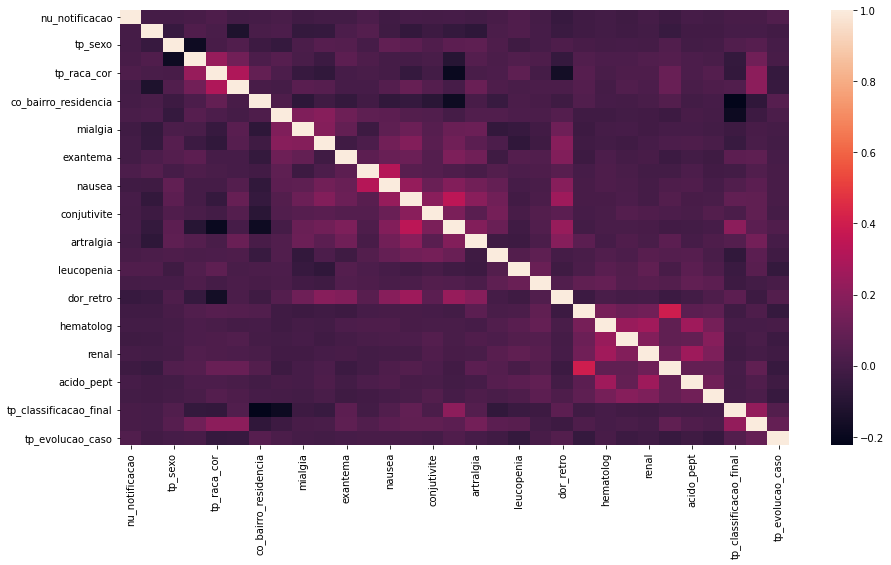

In [588]:
#criando o gráfico, annot true é para 
correlacao=df2.corr()
ax=sns.heatmap(correlacao, annot=False)
sns.color_palette("pastel")
ax.figure.set_size_inches(15,8)

In [589]:
df2.corr()

,nu_notificacao,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_bairro_residencia,febre,mialgia,cefaleia,...,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune,tp_classificacao_final,tp_criterio_confirmacao,tp_evolucao_caso
nu_notificacao,1.000000,-0.001019,0.000644,0.007355,0.025867,-0.006516,-0.001689,0.012432,-0.014196,-0.005072,...,-0.014476,-0.004145,-0.022108,-0.003582,-0.026662,0.001573,-0.006108,0.006400,0.008613,0.034593
nu_idade,-0.001019,1.000000,-0.044944,0.033332,0.011051,-0.126375,0.012506,0.021197,-0.053927,-0.049857,...,-0.017667,-0.006651,-0.013908,-0.008473,-0.041461,-0.010425,-0.009318,0.002788,0.002064,-0.010436
tp_sexo,0.000644,-0.044944,1.000000,-0.177006,0.006103,0.038433,-0.024022,-0.049578,0.018798,0.051372,...,0.008304,-0.002744,0.001614,-0.003686,0.037550,-0.007885,-0.001998,0.035369,0.053048,0.001213
tp_gestante,0.007355,0.033332,-0.177006,1.000000,0.235155,0.131249,0.020373,0.051814,0.012638,-0.029236,...,0.036376,0.022453,0.020368,0.035524,0.048336,0.022131,0.010606,-0.055457,0.125399,0.009594
tp_raca_cor,0.025867,0.011051,0.006103,0.235155,1.000000,0.303418,0.090895,0.023489,-0.045283,-0.062145,...,0.050073,0.010968,0.028747,0.027446,0.102901,0.022885,0.045342,-0.059604,0.207673,-0.050873
tp_escolaridade,-0.006516,-0.126375,0.038433,0.131249,0.303418,1.000000,0.008344,-0.002846,0.061603,0.051318,...,0.047266,0.000069,0.037670,0.020465,0.105791,0.014012,0.029135,0.034994,0.208201,-0.046326
co_bairro_residencia,-0.001689,0.012506,-0.024022,0.020373,0.090895,0.008344,1.000000,0.025057,-0.073047,-0.019670,...,0.037252,0.003217,-0.000600,0.012037,0.043178,-0.007035,0.003906,-0.224022,-0.067920,0.049232
febre,0.012432,0.021197,-0.049578,0.051814,0.023489,-0.002846,0.025057,1.000000,0.171733,0.196146,...,-0.016688,-0.017463,-0.005448,-0.011178,-0.025720,0.009340,-0.002844,-0.181205,-0.024717,0.019532
mialgia,-0.014196,-0.053927,0.018798,0.012638,-0.045283,0.061603,-0.073047,0.171733,1.000000,0.184153,...,-0.024158,-0.000570,0.001151,-0.013560,0.001005,0.003382,-0.007353,-0.027437,0.008034,0.000296
cefaleia,-0.005072,-0.049857,0.051372,-0.029236,-0.062145,0.051318,-0.019670,0.196146,0.184153,1.000000,...,-0.017388,-0.006183,-0.014456,0.003605,0.024316,0.027085,0.010664,-0.040403,0.010346,-0.008134


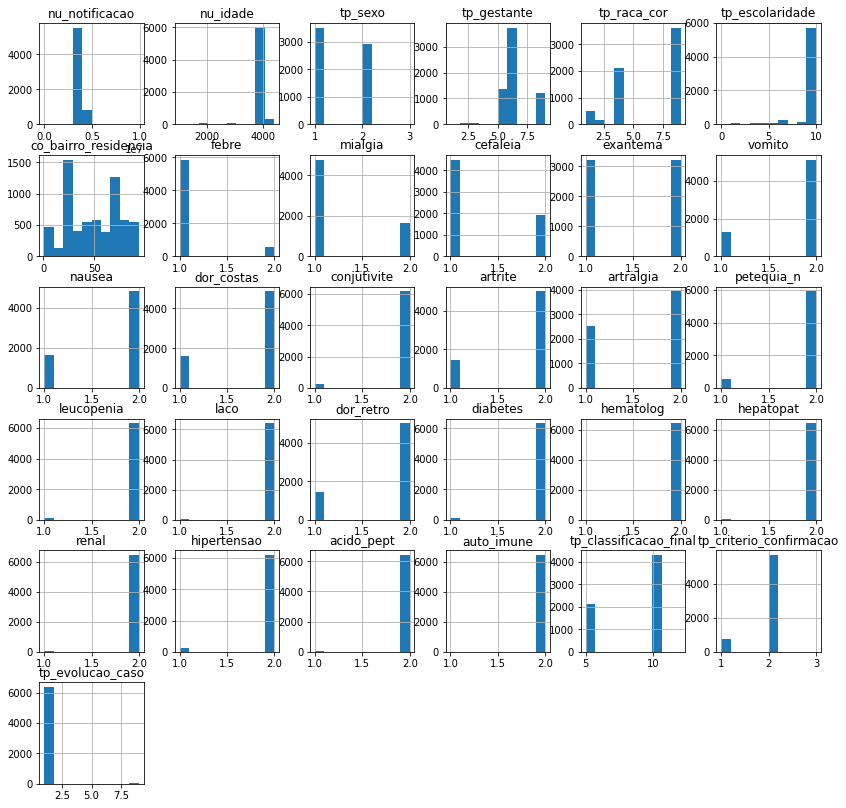

In [590]:
df2.hist(figsize=(14,14))
plt.show()

In [591]:
def resultado_dengue (tp_classificacao_final):
  if tp_classificacao_final == 5:
    return 0
  else:
    return 1
df2["resultado_dengue"]=df2["tp_classificacao_final"].apply(resultado_dengue)
print(df2)

      nu_notificacao  nu_idade  tp_sexo  tp_gestante  tp_raca_cor  \
0            3763405      4040        1          5.0            4   
1            3729166      4028        1          5.0            4   
2            3843264      4027        1          9.0            9   
3            3730948      4008        2          6.0            4   
4            3730884      4041        1          9.0            4   
...              ...       ...      ...          ...          ...   
9181         4031223      4044        2          6.0            1   
9192         3986972      4030        1          5.0            4   
9194         3986976      4069        2          6.0            4   
9196         3986971      4055        2          6.0            4   
9208         3986990      4035        1          5.0            4   

      tp_escolaridade  co_bairro_residencia  febre  mialgia  cefaleia  ...  \
0                 9.0                  23.0    2.0      1.0       1.0  ...   
1              

<ipython-input-591-07eae9282063>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["resultado_dengue"]=df2["tp_classificacao_final"].apply(resultado_dengue)


In [592]:
df2.groupby(by="resultado_dengue").size()

resultado_dengue
0    2134
1    4313
dtype: int64

In [593]:
df2=df2.drop(columns=["tp_classificacao_final"])

In [594]:
df2

,nu_notificacao,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_bairro_residencia,febre,mialgia,cefaleia,...,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune,tp_criterio_confirmacao,tp_evolucao_caso,resultado_dengue
0,3763405,4040,1,5.0,4,9.0,23.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0
1,3729166,4028,1,5.0,4,9.0,40.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1
2,3843264,4027,1,9.0,9,9.0,69.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0
3,3730948,4008,2,6.0,4,9.0,23.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1
4,3730884,4041,1,9.0,4,9.0,22.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9181,4031223,4044,2,6.0,1,6.0,69.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,9.0,1
9192,3986972,4030,1,5.0,4,9.0,23.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,9.0,1
9194,3986976,4069,2,6.0,4,9.0,43.0,1.0,1.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,9.0,1
9196,3986971,4055,2,6.0,4,9.0,83.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,1


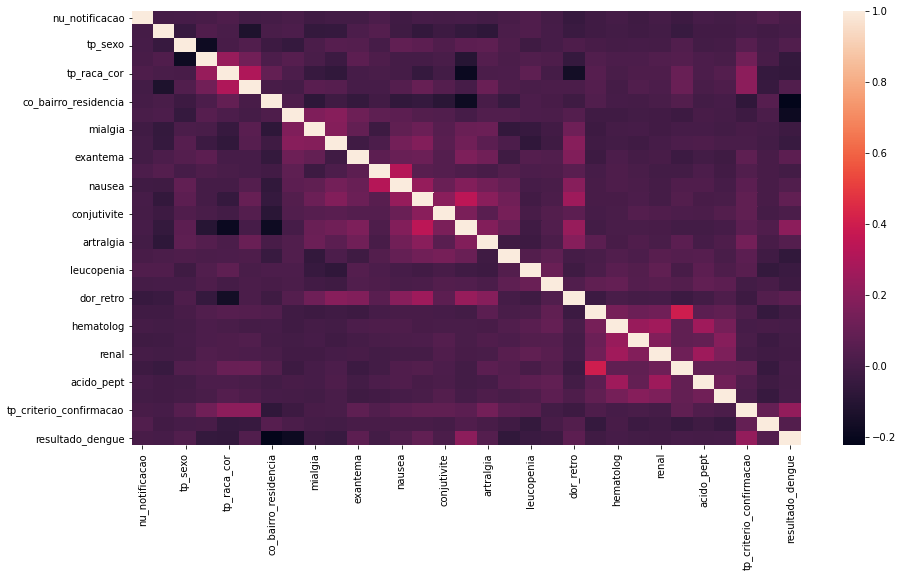

In [595]:
#criando o gráfico, annot true é para 
correlacao=df2.corr()
ax=sns.heatmap(correlacao, annot=False)
sns.color_palette("pastel")
ax.figure.set_size_inches(15,8)

In [596]:
df2.corr()

,nu_notificacao,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_bairro_residencia,febre,mialgia,cefaleia,...,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune,tp_criterio_confirmacao,tp_evolucao_caso,resultado_dengue
nu_notificacao,1.000000,-0.001019,0.000644,0.007355,0.025867,-0.006516,-0.001689,0.012432,-0.014196,-0.005072,...,-0.014476,-0.004145,-0.022108,-0.003582,-0.026662,0.001573,-0.006108,0.008613,0.034593,0.006542
nu_idade,-0.001019,1.000000,-0.044944,0.033332,0.011051,-0.126375,0.012506,0.021197,-0.053927,-0.049857,...,-0.017667,-0.006651,-0.013908,-0.008473,-0.041461,-0.010425,-0.009318,0.002064,-0.010436,0.002601
tp_sexo,0.000644,-0.044944,1.000000,-0.177006,0.006103,0.038433,-0.024022,-0.049578,0.018798,0.051372,...,0.008304,-0.002744,0.001614,-0.003686,0.037550,-0.007885,-0.001998,0.053048,0.001213,0.035152
tp_gestante,0.007355,0.033332,-0.177006,1.000000,0.235155,0.131249,0.020373,0.051814,0.012638,-0.029236,...,0.036376,0.022453,0.020368,0.035524,0.048336,0.022131,0.010606,0.125399,0.009594,-0.055599
tp_raca_cor,0.025867,0.011051,0.006103,0.235155,1.000000,0.303418,0.090895,0.023489,-0.045283,-0.062145,...,0.050073,0.010968,0.028747,0.027446,0.102901,0.022885,0.045342,0.207673,-0.050873,-0.058637
tp_escolaridade,-0.006516,-0.126375,0.038433,0.131249,0.303418,1.000000,0.008344,-0.002846,0.061603,0.051318,...,0.047266,0.000069,0.037670,0.020465,0.105791,0.014012,0.029135,0.208201,-0.046326,0.036798
co_bairro_residencia,-0.001689,0.012506,-0.024022,0.020373,0.090895,0.008344,1.000000,0.025057,-0.073047,-0.019670,...,0.037252,0.003217,-0.000600,0.012037,0.043178,-0.007035,0.003906,-0.067920,0.049232,-0.224242
febre,0.012432,0.021197,-0.049578,0.051814,0.023489,-0.002846,0.025057,1.000000,0.171733,0.196146,...,-0.016688,-0.017463,-0.005448,-0.011178,-0.025720,0.009340,-0.002844,-0.024717,0.019532,-0.182140
mialgia,-0.014196,-0.053927,0.018798,0.012638,-0.045283,0.061603,-0.073047,0.171733,1.000000,0.184153,...,-0.024158,-0.000570,0.001151,-0.013560,0.001005,0.003382,-0.007353,0.008034,0.000296,-0.028059
cefaleia,-0.005072,-0.049857,0.051372,-0.029236,-0.062145,0.051318,-0.019670,0.196146,0.184153,1.000000,...,-0.017388,-0.006183,-0.014456,0.003605,0.024316,0.027085,0.010664,0.010346,-0.008134,-0.040867


In [597]:
import matplotlib as mpl #importando o matplotlib
mpl.__version__ #versão usada
import pandas as pd
import numpy as np

In [598]:
import matplotlib.pyplot as plt
%matplotlib inline

In [599]:
#inserindo cada atributo da tabela resultante em um vetor para melhor manipulação dos dados
vetor_notificacao=np.array(df2.nu_notificacao)
vetor_idade=np.array(df2.nu_idade)
vetor_sexo=np.array(df2.tp_sexo)
vetor_gestante=np.array(df2.tp_gestante)
vetor_raca=np.array(df2.tp_raca_cor)
vetor_escolaridade=np.array(df2.tp_escolaridade)
vetor_bairro=np.array(df2.co_bairro_residencia)
vetor_febre=np.array(df2.febre)
vetor_mialgia=np.array(df2.mialgia)
vetor_cefaleia=np.array(df2.cefaleia)
vetor_exantema=np.array(df2.exantema)
vetor_vomito=np.array(df2.vomito)
vetor_nausea=np.array(df2.nausea)
vetor_dorcostas=np.array(df2.dor_costas)
vetor_conjuntivite=np.array(df2.conjutivite)
vetor_artrite=np.array(df2.artrite)
vetor_artralgia=np.array(df2.artralgia)
vetor_petequia=np.array(df2.petequia_n)
vetor_leucopenia=np.array(df2.leucopenia)
vetor_laco=np.array(df2.laco)
vetor_dorretro=np.array(df2.dor_retro)
vetor_diabetes=np.array(df2.diabetes)
vetor_hemato=np.array(df2.hematolog)
vetor_hepato=np.array(df2.hepatopat)
vetor_renal=np.array(df2.renal)
vetor_hipertensao=np.array(df2.hipertensao)
vetor_acidpept=np.array(df2.acido_pept)
vetor_autoimune=np.array(df2.auto_imune)
vetor_criterioconf=np.array(df2.tp_criterio_confirmacao)
vetor_evolucao=np.array(df2.tp_evolucao_caso)
vetor_resultado=np.array(df2.resultado_dengue)


In [600]:
df3=pd.DataFrame()
df3

""


In [601]:
df2.columns.tolist()

['nu_notificacao',
 'nu_idade',
 'tp_sexo',
 'tp_gestante',
 'tp_raca_cor',
 'tp_escolaridade',
 'co_bairro_residencia',
 'febre',
 'mialgia',
 'cefaleia',
 'exantema',
 'vomito',
 'nausea',
 'dor_costas',
 'conjutivite',
 'artrite',
 'artralgia',
 'petequia_n',
 'leucopenia',
 'laco',
 'dor_retro',
 'diabetes',
 'hematolog',
 'hepatopat',
 'renal',
 'hipertensao',
 'acido_pept',
 'auto_imune',
 'tp_criterio_confirmacao',
 'tp_evolucao_caso',
 'resultado_dengue']

In [602]:
colunas=["notificacao", "idade", "sexo", "gestante", "raca", "escolaridade", "bairro", "criterioconf", "evolucao", "resultado"]

In [603]:
df3=pd.DataFrame(columns=colunas)
df3.notificacao=vetor_notificacao
df3.idade=vetor_idade
df3.sexo=vetor_sexo
df3.gestante=vetor_gestante
df3.raca=vetor_raca
df3.escolaridade=vetor_escolaridade
df3.bairro=vetor_bairro
df3.criterioconf=vetor_criterioconf
df3.evolucao=vetor_evolucao
df3.resultado=vetor_resultado
df3

,notificacao,idade,sexo,gestante,raca,escolaridade,bairro,criterioconf,evolucao,resultado
0,3763405,4040,1,5.0,4,9.0,23.0,2.0,1.0,0
1,3729166,4028,1,5.0,4,9.0,40.0,2.0,1.0,1
2,3843264,4027,1,9.0,9,9.0,69.0,2.0,1.0,0
3,3730948,4008,2,6.0,4,9.0,23.0,2.0,1.0,1
4,3730884,4041,1,9.0,4,9.0,22.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
6442,4031223,4044,2,6.0,1,6.0,69.0,2.0,9.0,1
6443,3986972,4030,1,5.0,4,9.0,23.0,2.0,9.0,1
6444,3986976,4069,2,6.0,4,9.0,43.0,2.0,9.0,1
6445,3986971,4055,2,6.0,4,9.0,83.0,2.0,9.0,1


Verificando os dados do dataframe com os dados sociais 

In [604]:
df3.info

<bound method DataFrame.info of       notificacao  idade  sexo  gestante  raca  escolaridade  bairro  \
0         3763405   4040     1       5.0     4           9.0    23.0   
1         3729166   4028     1       5.0     4           9.0    40.0   
2         3843264   4027     1       9.0     9           9.0    69.0   
3         3730948   4008     2       6.0     4           9.0    23.0   
4         3730884   4041     1       9.0     4           9.0    22.0   
...           ...    ...   ...       ...   ...           ...     ...   
6442      4031223   4044     2       6.0     1           6.0    69.0   
6443      3986972   4030     1       5.0     4           9.0    23.0   
6444      3986976   4069     2       6.0     4           9.0    43.0   
6445      3986971   4055     2       6.0     4           9.0    83.0   
6446      3986990   4035     1       5.0     4           9.0     6.0   

      criterioconf  evolucao  resultado  
0              2.0       1.0          0  
1              2.0 

In [605]:
df3.shape

(6447, 10)

In [606]:
df3.describe

<bound method NDFrame.describe of       notificacao  idade  sexo  gestante  raca  escolaridade  bairro  \
0         3763405   4040     1       5.0     4           9.0    23.0   
1         3729166   4028     1       5.0     4           9.0    40.0   
2         3843264   4027     1       9.0     9           9.0    69.0   
3         3730948   4008     2       6.0     4           9.0    23.0   
4         3730884   4041     1       9.0     4           9.0    22.0   
...           ...    ...   ...       ...   ...           ...     ...   
6442      4031223   4044     2       6.0     1           6.0    69.0   
6443      3986972   4030     1       5.0     4           9.0    23.0   
6444      3986976   4069     2       6.0     4           9.0    43.0   
6445      3986971   4055     2       6.0     4           9.0    83.0   
6446      3986990   4035     1       5.0     4           9.0     6.0   

      criterioconf  evolucao  resultado  
0              2.0       1.0          0  
1              2.

In [607]:
df3.head()

,notificacao,idade,sexo,gestante,raca,escolaridade,bairro,criterioconf,evolucao,resultado
0,3763405,4040,1,5.0,4,9.0,23.0,2.0,1.0,0
1,3729166,4028,1,5.0,4,9.0,40.0,2.0,1.0,1
2,3843264,4027,1,9.0,9,9.0,69.0,2.0,1.0,0
3,3730948,4008,2,6.0,4,9.0,23.0,2.0,1.0,1
4,3730884,4041,1,9.0,4,9.0,22.0,2.0,1.0,1


In [608]:
df3.tail()

,notificacao,idade,sexo,gestante,raca,escolaridade,bairro,criterioconf,evolucao,resultado
6442,4031223,4044,2,6.0,1,6.0,69.0,2.0,9.0,1
6443,3986972,4030,1,5.0,4,9.0,23.0,2.0,9.0,1
6444,3986976,4069,2,6.0,4,9.0,43.0,2.0,9.0,1
6445,3986971,4055,2,6.0,4,9.0,83.0,2.0,9.0,1
6446,3986990,4035,1,5.0,4,9.0,6.0,2.0,9.0,1


In [609]:
df3.isna().sum()

notificacao     0
idade           0
sexo            0
gestante        0
raca            0
escolaridade    0
bairro          0
criterioconf    0
evolucao        0
resultado       0
dtype: int64

In [610]:
df3.isnull().sum()

notificacao     0
idade           0
sexo            0
gestante        0
raca            0
escolaridade    0
bairro          0
criterioconf    0
evolucao        0
resultado       0
dtype: int64

In [611]:
df3.dtypes

notificacao       int64
idade             int64
sexo              int64
gestante        float64
raca              int64
escolaridade    float64
bairro          float64
criterioconf    float64
evolucao        float64
resultado         int64
dtype: object

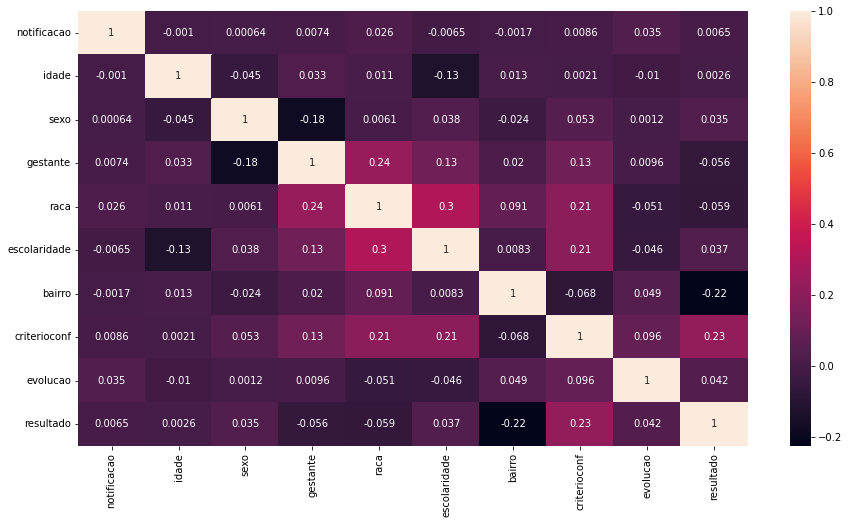

In [612]:
correlacao2=df3.corr()
ax=sns.heatmap(correlacao2, annot=True)
sns.color_palette('pastel')
ax.figure.set_size_inches(15,8)

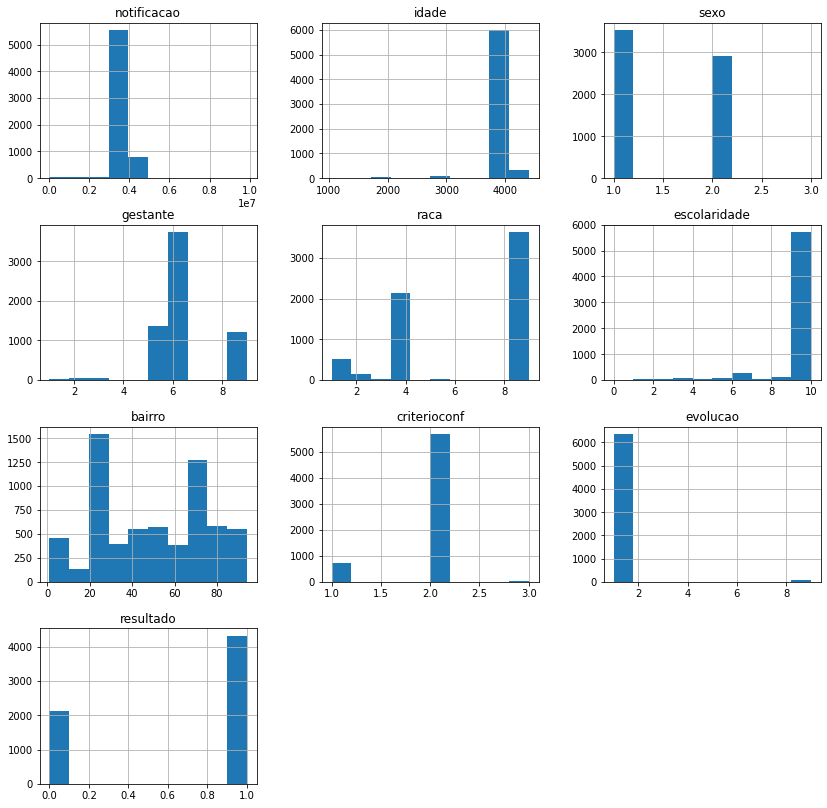

In [613]:
df3.hist(figsize=(14,14))
plt.show()

Explorando os dados com gráficos, acima obervamos algumas correlações importantes como:

Resultado dengue com bairro

Resultado dengue com criterio classificao

Raça e escolaridade

Raça e gestante

Escolaridade e gestante

Alguns gráficos para ajudar na visualização.

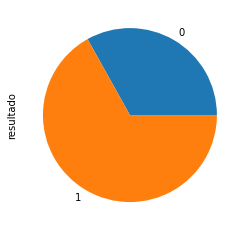

In [614]:
df3.groupby(["resultado"]).resultado.count().sort_values().plot(kind="pie")

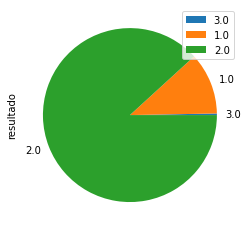

In [615]:
df3.groupby(["criterioconf"]).resultado.count().sort_values().plot(kind="pie")
plt.legend(loc="upper right")
plt.show()

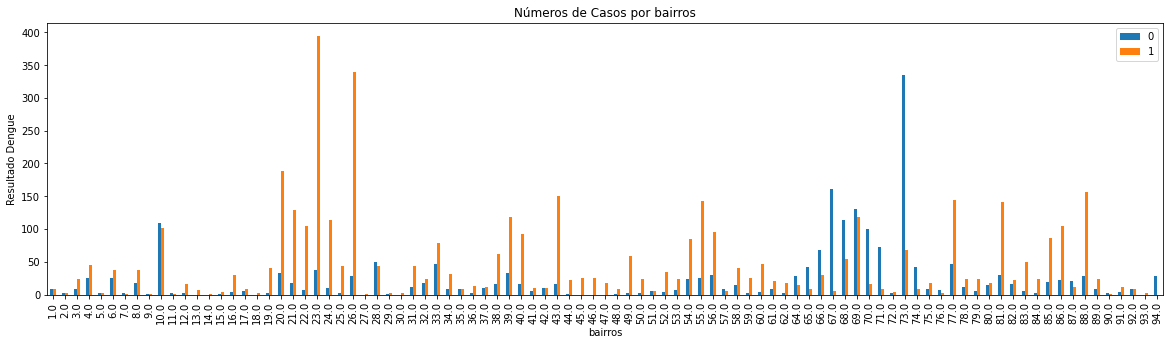

In [616]:
#resultado por bairro
resultado_bairro=df3.groupby([df3["resultado"], "bairro"]).size()
resultado_bairro=resultado_bairro.unstack(level=0).fillna(0)
resultado_bairro.plot(kind="bar", figsize=(20,5))
plt.xlabel("bairros")
plt.ylabel("Resultado Dengue")
plt.title("Números de Casos por bairros")
plt.legend()
plt.show()

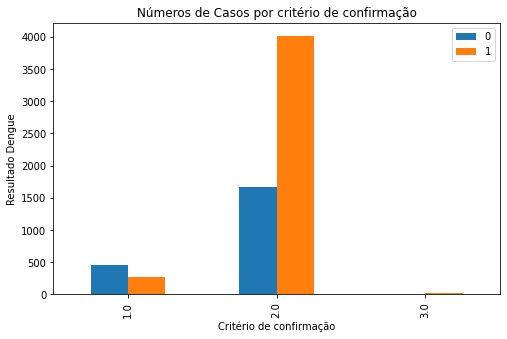

In [617]:
#resultado por critério de confirmação
resultado_criterio=df3.groupby([df3["resultado"], "criterioconf"]).size()
resultado_criterio=resultado_criterio.unstack(level=0).fillna(0)
resultado_criterio.plot(kind="bar", figsize=(8,5))
plt.xlabel("Critério de confirmação")
plt.ylabel("Resultado Dengue")
plt.title("Números de Casos por critério de confirmação")
plt.legend()
plt.show()

A maioria dos casos foram confirmados por critério clínico.

Do total de casos confirmados, 92,74% casos confirmados por avaliação clínica.

Do total de casos descartados, 74,97% casos foram descartados por avaliação clínica.

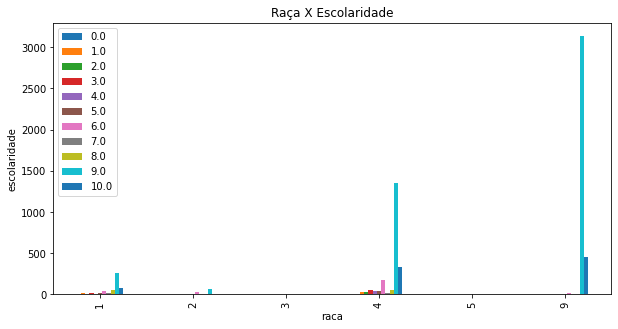

In [618]:
#Raça por escolaridade
raca_escolaridade=df3.groupby([df3["escolaridade"], "raca"]).size()
raca_escolaridade=raca_escolaridade.unstack(level=0).fillna(0)
raca_escolaridade.plot(kind="bar", figsize=(10,5))
plt.xlabel("raca")
plt.ylabel("escolaridade")
plt.title("Raça X Escolaridade")
plt.legend()
plt.show()

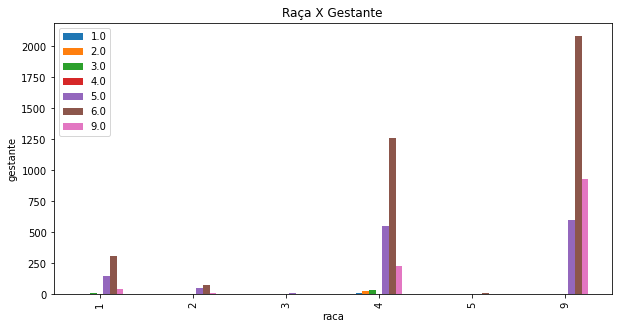

In [619]:
#Raça por gestante
raca_gestante=df3.groupby([df3["gestante"], "raca"]).size()
raca_gestante=raca_gestante.unstack(level=0).fillna(0)
raca_gestante.plot(kind="bar", figsize=(10,5))
plt.xlabel("raca")
plt.ylabel("gestante")
plt.title("Raça X Gestante")
plt.legend()
plt.show()

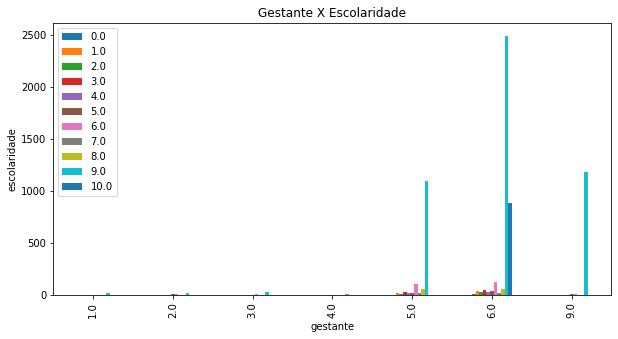

In [620]:
#Escolaridade e gestante
escolaridade_gestante=df3.groupby([df3["escolaridade"], "gestante"]).size()
escolaridade_gestante=escolaridade_gestante.unstack(level=0).fillna(0)
escolaridade_gestante.plot(kind="bar", figsize=(10,5))
plt.xlabel("gestante")
plt.ylabel("escolaridade")
plt.title("Gestante X Escolaridade")
plt.legend()
plt.show()

###Criando modelos utilizando classificadores

In [621]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [622]:
#seleção de variáveis preditoras (Feature Selection)
atributos=["notificacao", "idade", "sexo", "gestante", "raca", "escolaridade", "bairro", "criterioconf", "evolucao"]

In [623]:
#variável a ser predita
atrib_prev=["resultado"]

In [624]:
#criando objetos
X=df3[atributos].values
y=df3[atrib_prev].values

In [625]:
#definindo a taxa de split (taxa de partição do conjunto de teste)
split_test_size=0.20

In [626]:
#criando dados de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=split_test_size, shuffle=True, random_state=24)

In [627]:
perc_treino = (len(X_treino)/len(df3.index))*100
perc_treino = round(perc_treino, 2)
print(perc_treino, "%", "para os dados de treino.")

perc_teste=(len(X_teste)/len(df3.index))*100
perc_teste = round(perc_teste, 2)
print(perc_teste, "%", "para os dados de teste.")



79.99 % para os dados de treino.
20.01 % para os dados de teste.


In [628]:
#verificando se existem valores nulos
df3.isnull().values.any()

False

In [629]:
from sklearn.impute import SimpleImputer

In [630]:
#criando objeto
imput_media=SimpleImputer(missing_values=0, strategy="mean")

#substituindo os valores iguas a zero pela média dos dados
X_treino=imput_media.fit_transform(X_treino)
X_teste=imput_media.fit_transform(X_teste)

In [631]:
from sklearn.naive_bayes import GaussianNB #https://scikit-learn.org

In [632]:
#criando o modelo preditivo
modelo1=GaussianNB()

In [633]:
#treinando omodelo, ravel faz com que o algoritmo Guassian consiga trabalhar com o array do numpy
modelo1.fit(X_treino, y_treino.ravel())

GaussianNB()

In [634]:
from sklearn import metrics

In [635]:
nb_predict_test=modelo1.predict(X_teste)

In [636]:
nb_acc_test=metrics.accuracy_score(y_teste, nb_predict_test)

In [637]:
nb_acc_test=(round(nb_acc_test,2))*100


In [638]:
print("Exatidão(Accuracy):", nb_acc_test, "%")

Exatidão(Accuracy): 66.0 %


In [639]:
#Métricas
print(metrics.classification_report(y_teste, nb_predict_test))

              precision    recall  f1-score   support

           0       0.25      0.02      0.03       425
           1       0.67      0.98      0.79       865

    accuracy                           0.66      1290
   macro avg       0.46      0.50      0.41      1290
weighted avg       0.53      0.66      0.54      1290



In [640]:
df3.groupby(by="resultado").size()

resultado
0    2134
1    4313
dtype: int64

In [641]:
from sklearn.ensemble import RandomForestClassifier

In [642]:
modelo2=RandomForestClassifier(random_state=24)
modelo2.fit(X_treino, y_treino.ravel())

RandomForestClassifier(random_state=24)

In [643]:
rf_predict_train=modelo2.predict(X_treino)
ac_treino=metrics.accuracy_score(y_treino, rf_predict_train)
print("Exatidão (Accuracy): %.4f" %(ac_treino))

Exatidão (Accuracy): 1.0000


In [644]:
rf_predict_test=modelo2.predict(X_teste)
rf_ac_test=metrics.accuracy_score(y_teste, rf_predict_test)
print("Exatidão (Accuracy): %.4f" %rf_ac_test)

Exatidão (Accuracy): 0.8504


In [645]:
print(metrics.classification_report(y_teste, rf_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       425
           1       0.87      0.92      0.89       865

    accuracy                           0.85      1290
   macro avg       0.84      0.81      0.82      1290
weighted avg       0.85      0.85      0.85      1290



In [646]:
from sklearn.linear_model import LogisticRegression

In [647]:
modelo3=LogisticRegression(C=0.5, random_state=42, max_iter=100)
modelo3.fit(X_treino, y_treino.ravel())
lr_predict_test=modelo3.predict(X_teste)

In [648]:
ac_teste_rl=metrics.accuracy_score(y_teste, lr_predict_test)
print("Exatidão (Accuracy): %.4f" %ac_teste_rl)
print("Classification Report", metrics.classification_report(y_teste, lr_predict_test))

Exatidão (Accuracy): 0.6705
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00       425
           1       0.67      1.00      0.80       865

    accuracy                           0.67      1290
   macro avg       0.34      0.50      0.40      1290
weighted avg       0.45      0.67      0.54      1290



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [649]:
print("Modelo usando algoritmo Naive Bayes:", nb_acc_test, "%")
print("Modelo usando algoritmo Random Forest:", (round (rf_ac_test, 2))*100, "%")
print("Modelo usando algoritmo Regressão Logística:", (round (ac_teste_rl, 2))*100, "%")

Modelo usando algoritmo Naive Bayes: 66.0 %
Modelo usando algoritmo Random Forest: 85.0 %
Modelo usando algoritmo Regressão Logística: 67.0 %


Dos modelos utilizados o random Forest foi o único que conseguiu aprender com as duas situações, casos confirmados e descartados. O Naive Bayes e a regressão logística só aprenderam com a situação de caso confirmado.

In [650]:
df2.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['nu_notificacao', 'nu_idade', 'tp_sexo', 'tp_gestante', 'tp_raca_cor',
       'tp_escolaridade', 'co_bairro_residencia', 'febre', 'mialgia',
       'cefaleia', 'exantema', 'vomito', 'nausea', 'dor_costas', 'conjutivite',
       'artrite', 'artralgia', 'petequia_n', 'leucopenia', 'laco', 'dor_retro',
       'diabetes', 'hematolog', 'hepatopat', 'renal', 'hipertensao',
       'acido_pept', 'auto_imune', 'tp_criterio_confirmacao',
       'tp_evolucao_caso', 'resultado_dengue'],
      dtype='object')>

Aqui criei um dataframe com os dados de sintomas clínicos, excluindo os que eram referentes a exames laboratoriais. 

In [651]:
df4=pd.DataFrame()
df4

""


In [652]:
colunas=["notificacao", "febre", "cefaleia", "exantema", "vomito", "nausea", "dorcostas", "conjuntivite", "artrite", "artralgia", "petequia", "laco", "dorretro", "diabetes", "hipertensao", "evolucao", "resultado"]

In [653]:
df4=pd.DataFrame(columns=colunas)
df4.notificacao=vetor_notificacao
df4.febre=vetor_febre
df4.cefaleia=vetor_cefaleia
df4.exantema=vetor_exantema
df4.vomito=vetor_vomito
df4.nausea=vetor_nausea
df4.dorcostas=vetor_dorcostas
df4.conjuntivite=vetor_conjuntivite
df4.artrite=vetor_artrite
df4.artralgia=vetor_artralgia
df4.petequia=vetor_petequia
df4.leucopenia=vetor_leucopenia
df4.laco=vetor_laco
df4.dorretro=vetor_dorretro
df4.diabetes=vetor_diabetes
df4.hemato=vetor_hemato
df4.hepato=vetor_hepato
df4.renal=vetor_renal
df4.hipertensao=vetor_hipertensao
df4.evolucao=vetor_evolucao
df4.resultado=vetor_resultado
df4

<ipython-input-653-062f7bac319e>:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df4.leucopenia=vetor_leucopenia
<ipython-input-653-062f7bac319e>:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df4.hemato=vetor_hemato
<ipython-input-653-062f7bac319e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df4.hepato=vetor_hepato
<ipython-input-653-062f7bac319e>:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df4.renal=vetor_renal


,notificacao,febre,cefaleia,exantema,vomito,nausea,dorcostas,conjuntivite,artrite,artralgia,petequia,laco,dorretro,diabetes,hipertensao,evolucao,resultado
0,3763405,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0
1,3729166,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1
2,3843264,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0
3,3730948,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1
4,3730884,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6442,4031223,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,9.0,1
6443,3986972,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,9.0,1
6444,3986976,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,1
6445,3986971,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,9.0,1


In [654]:
df4.info

<bound method DataFrame.info of       notificacao  febre  cefaleia  exantema  vomito  nausea  dorcostas  \
0         3763405    2.0       1.0       2.0     2.0     2.0        2.0   
1         3729166    1.0       1.0       2.0     1.0     2.0        2.0   
2         3843264    1.0       1.0       2.0     2.0     2.0        2.0   
3         3730948    1.0       1.0       1.0     2.0     2.0        2.0   
4         3730884    1.0       1.0       2.0     2.0     2.0        2.0   
...           ...    ...       ...       ...     ...     ...        ...   
6442      4031223    2.0       1.0       2.0     2.0     2.0        1.0   
6443      3986972    2.0       1.0       2.0     1.0     2.0        2.0   
6444      3986976    1.0       1.0       2.0     2.0     2.0        2.0   
6445      3986971    1.0       1.0       1.0     1.0     1.0        2.0   
6446      3986990    1.0       1.0       1.0     2.0     2.0        2.0   

      conjuntivite  artrite  artralgia  petequia  laco  dorretro  d

In [655]:
df4.shape

(6447, 17)

In [656]:
df4.describe

<bound method NDFrame.describe of       notificacao  febre  cefaleia  exantema  vomito  nausea  dorcostas  \
0         3763405    2.0       1.0       2.0     2.0     2.0        2.0   
1         3729166    1.0       1.0       2.0     1.0     2.0        2.0   
2         3843264    1.0       1.0       2.0     2.0     2.0        2.0   
3         3730948    1.0       1.0       1.0     2.0     2.0        2.0   
4         3730884    1.0       1.0       2.0     2.0     2.0        2.0   
...           ...    ...       ...       ...     ...     ...        ...   
6442      4031223    2.0       1.0       2.0     2.0     2.0        1.0   
6443      3986972    2.0       1.0       2.0     1.0     2.0        2.0   
6444      3986976    1.0       1.0       2.0     2.0     2.0        2.0   
6445      3986971    1.0       1.0       1.0     1.0     1.0        2.0   
6446      3986990    1.0       1.0       1.0     2.0     2.0        2.0   

      conjuntivite  artrite  artralgia  petequia  laco  dorretro 

In [657]:
df4.head()

,notificacao,febre,cefaleia,exantema,vomito,nausea,dorcostas,conjuntivite,artrite,artralgia,petequia,laco,dorretro,diabetes,hipertensao,evolucao,resultado
0,3763405,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0
1,3729166,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1
2,3843264,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0
3,3730948,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1
4,3730884,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1


In [658]:
df4.tail()

,notificacao,febre,cefaleia,exantema,vomito,nausea,dorcostas,conjuntivite,artrite,artralgia,petequia,laco,dorretro,diabetes,hipertensao,evolucao,resultado
6442,4031223,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,9.0,1
6443,3986972,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,9.0,1
6444,3986976,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,1
6445,3986971,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,9.0,1
6446,3986990,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,1


In [659]:
df4.isna().sum()

notificacao     0
febre           0
cefaleia        0
exantema        0
vomito          0
nausea          0
dorcostas       0
conjuntivite    0
artrite         0
artralgia       0
petequia        0
laco            0
dorretro        0
diabetes        0
hipertensao     0
evolucao        0
resultado       0
dtype: int64

In [660]:
df4.isnull().sum()

notificacao     0
febre           0
cefaleia        0
exantema        0
vomito          0
nausea          0
dorcostas       0
conjuntivite    0
artrite         0
artralgia       0
petequia        0
laco            0
dorretro        0
diabetes        0
hipertensao     0
evolucao        0
resultado       0
dtype: int64

In [661]:
df4.dtypes

notificacao       int64
febre           float64
cefaleia        float64
exantema        float64
vomito          float64
nausea          float64
dorcostas       float64
conjuntivite    float64
artrite         float64
artralgia       float64
petequia        float64
laco            float64
dorretro        float64
diabetes        float64
hipertensao     float64
evolucao        float64
resultado         int64
dtype: object

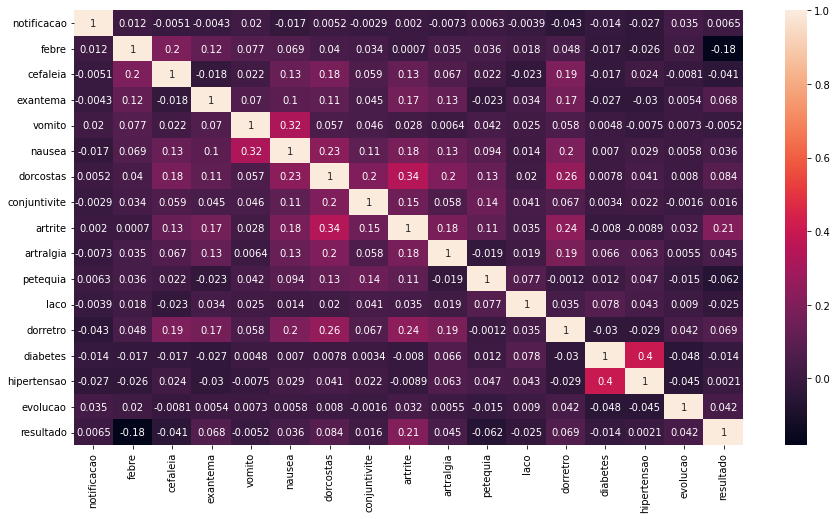

In [662]:
correlacao3=df4.corr()
ax=sns.heatmap(correlacao3, annot=True)
sns.color_palette("pastel")
ax.figure.set_size_inches(15,8)

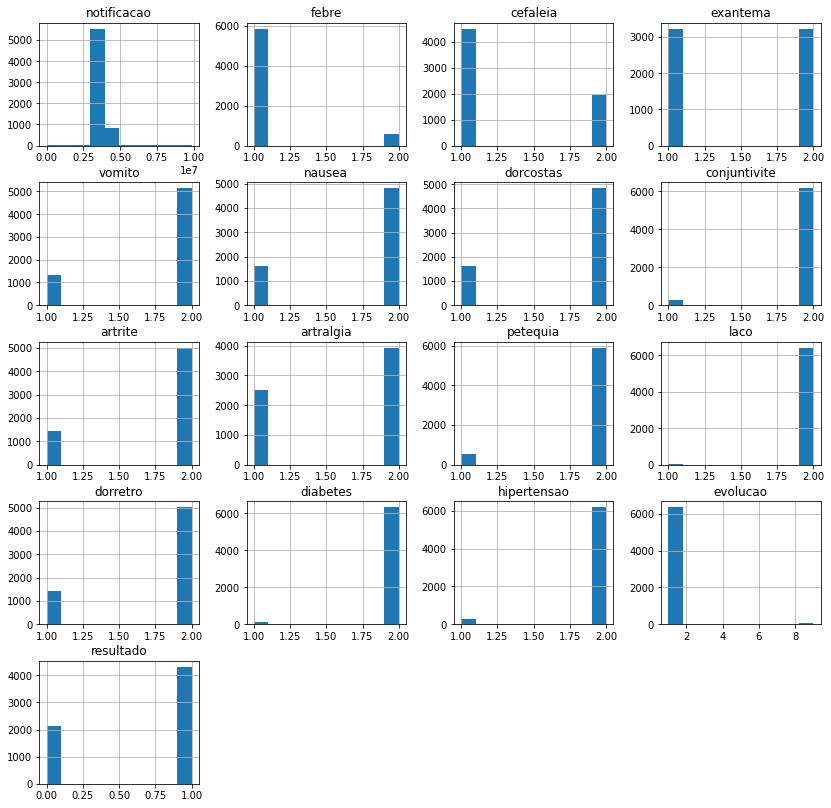

In [663]:
df4.hist(figsize=(14,14))
plt.show()

In [664]:
#definindo as classes
resultado_map={1:1, 0:0}

In [665]:
#aplicando o mapeamnento ao dataset
df4["resultado"]=df4["resultado"].map(resultado_map)

In [666]:
#verificando como os dados estão distribuídos

num_true=len(df4.loc[df4["resultado"]==True])
num_false=len(df4.loc[df4["resultado"]==False])
print("Número de Casos Confirmados: {0} ({1:2.2f}%)".format(num_true, num_true/ (num_true  +num_false)*100))
print("Número de Casos Descartados: {0} ({1:2.2f}%)".format(num_false, num_false/ (num_true + num_false)*100))

Número de Casos Confirmados: 4313 (66.90%)
Número de Casos Descartados: 2134 (33.10%)


In [667]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [668]:
#seleção de variáveis preditoras (Feature Selection)
atributos=["notificacao", "febre", "cefaleia", "exantema", "vomito", "nausea", "dorcostas", "conjuntivite", "artrite", "artralgia", "petequia", "laco", "dorretro", "diabetes", "hipertensao", "evolucao"]

In [669]:
#variável a ser predita
atrib_prev=["resultado"]

In [670]:
#criando objetos
X=df4[atributos].values
y=df4[atrib_prev].values

In [671]:
#definindo a taxa de split (taxa de partição do conjunto de teste)
split_test_size=0.20

In [672]:
#criando dados de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=split_test_size, shuffle=True, random_state=24)

In [673]:
perc_treino = (len(X_treino)/len(df4.index))*100
perc_treino = round(perc_treino, 2)
print(perc_treino, "%", "para os dados de treino.")

perc_teste=(len(X_teste)/len(df4.index))*100
perc_teste = round(perc_teste, 2)
print(perc_teste, "%", "para os dados de teste.")

79.99 % para os dados de treino.
20.01 % para os dados de teste.


In [674]:
#verificando se existem valores nulos
df4.isnull().values.any()

False

In [675]:
from sklearn.impute import SimpleImputer

In [676]:
#criando objeto
imput_media=SimpleImputer(missing_values=0, strategy="mean")

#substituindo os valores iguas a zero pela média dos dados
X_treino=imput_media.fit_transform(X_treino)
X_teste=imput_media.fit_transform(X_teste)

In [677]:
from sklearn.naive_bayes import GaussianNB #https://scikit-learn.org

In [678]:
#criando o modelo preditivo
modelo1=GaussianNB()

In [679]:
#treinando omodelo, ravel faz com que o algoritmo Guassian consiga trabalhar com o array do numpy
modelo1.fit(X_treino, y_treino.ravel())

GaussianNB()

In [680]:
from sklearn import metrics

In [681]:
nb_predict_test=modelo1.predict(X_teste)

In [682]:
nb_acc_test=metrics.accuracy_score(y_teste, nb_predict_test)

In [683]:
nb_acc_test=(round(nb_acc_test,2))*100

In [684]:
print("Exatidão(Accuracy):", nb_acc_test, "%")

Exatidão(Accuracy): 67.0 %


In [685]:
#Métricas
print(metrics.classification_report(y_teste, nb_predict_test))

              precision    recall  f1-score   support

           0       0.20      0.00      0.01       425
           1       0.67      0.99      0.80       865

    accuracy                           0.67      1290
   macro avg       0.43      0.50      0.40      1290
weighted avg       0.51      0.67      0.54      1290



In [686]:
from sklearn.ensemble import RandomForestClassifier

In [687]:
modelo2=RandomForestClassifier(random_state=24)
modelo2.fit(X_treino, y_treino.ravel())

RandomForestClassifier(random_state=24)

In [688]:
rf_predict_train=modelo2.predict(X_treino)
ac_treino=metrics.accuracy_score(y_treino, rf_predict_train)
print("Exatidão (Accuracy): %.4f" %(ac_treino))

Exatidão (Accuracy): 0.9998


In [689]:
rf_predict_test=modelo2.predict(X_teste)
rf_ac_test=metrics.accuracy_score(y_teste, rf_predict_test)
print("Exatidão (Accuracy): %.4f" %rf_ac_test)

Exatidão (Accuracy): 0.7868


In [690]:
print(metrics.classification_report(y_teste, rf_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       425
           1       0.83      0.86      0.84       865

    accuracy                           0.79      1290
   macro avg       0.76      0.75      0.75      1290
weighted avg       0.78      0.79      0.78      1290



In [691]:
from sklearn.linear_model import LogisticRegression

In [692]:
modelo3=LogisticRegression(C=0.5, random_state=42, max_iter=100)
modelo3.fit(X_treino, y_treino.ravel())
lr_predict_test=modelo3.predict(X_teste)

In [693]:
ac_teste_rl=metrics.accuracy_score(y_teste, lr_predict_test)
print("Exatidão (Accuracy): %.4f" %ac_teste_rl)
print("Classification Report", metrics.classification_report(y_teste, lr_predict_test))

Exatidão (Accuracy): 0.6705
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00       425
           1       0.67      1.00      0.80       865

    accuracy                           0.67      1290
   macro avg       0.34      0.50      0.40      1290
weighted avg       0.45      0.67      0.54      1290



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [694]:
print("Modelo usando algoritmo Naive Bayes:", nb_acc_test, "%")
print("Modelo usando algoritmo Random Forest:", (round (rf_ac_test, 2))*100, "%")
print("Modelo usando algoritmo Regressão Logística:", (round (ac_teste_rl, 2))*100, "%")

Modelo usando algoritmo Naive Bayes: 67.0 %
Modelo usando algoritmo Random Forest: 79.0 %
Modelo usando algoritmo Regressão Logística: 67.0 %


Assim, como ocorreu no caso dos dados sociais, apenas o modelo utilizando o algoritmo random forest conseguiu aprender com as duas situaçoes. O naive Bayes e a regressão logística não conseguiram aprender com a situação de casos descartados. 